In [217]:
import numpy as np
import pandas as pd
import sqlite3


In [218]:
con = sqlite3.connect('/Users/jacobcrawford/PycharmProjects/Learn_Web_Scraping/lotto_numbers')

In [219]:
sql_query = pd.read_sql('select date, first, second, third, fourth, fifth from lotto_numbers', con)

In [220]:
# convert sql to DataFrame
df = pd.DataFrame(sql_query, columns=["date", "first", "second", "third", "fourth", "fifth"])

In [221]:
con.close()

In [222]:
df.median(numeric_only=True)

first      6.0
second    14.0
third     23.0
fourth    31.0
fifth     40.0
dtype: float64

In [223]:
df.mean(numeric_only=True)

first      7.683527
second    15.179934
third     22.927722
fourth    30.442510
fifth     38.060945
dtype: float64

In [224]:
y = df['fourth']

In [225]:
x = df[['first', 'second', 'third', 'fifth']]

In [226]:
y.shape

(7236,)

In [227]:
x.shape

(7236, 4)

In [228]:
from sklearn.model_selection  import train_test_split

In [229]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [230]:
from sklearn.linear_model import LinearRegression

In [231]:
lm = LinearRegression()

In [232]:
lm.fit(X_train,y_train)

LinearRegression()

In [233]:
predictions = lm.predict(X_test)

In [234]:
predictions_as_ints = []
for i in predictions:
    predictions_as_ints.append(i.round())

In [235]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions_as_ints)

In [236]:
accuracy

0.13035467526485492

In [237]:
x.shape

(7236, 4)

In [238]:
y.shape

(7236,)

In [239]:
##### PCA RESEARCH  model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [240]:
df_numbers = df.drop(['date'], axis=1)

In [241]:
df_numbers.head()

,first,second,third,fourth,fifth
0,12,17,20,22,35
1,11,13,20,24,38
2,3,5,12,18,32
3,3,5,12,16,29
4,20,29,35,36,37


In [242]:
from sklearn.decomposition import PCA

In [243]:
pca = PCA(n_components=5)

In [244]:
pca.fit(df_numbers)

PCA(n_components=5)

In [245]:
x_pca = pca.transform(df_numbers)

In [246]:
x_pca[:9]

array([[ -4.77042958,   8.7157699 ,   2.48435489,   1.38680134,
         -2.08437432],
       [ -5.08069749,   3.719159  ,   3.62505649,   0.23506849,
         -3.60421794],
       [-20.74636054,   1.41207567,   0.38111109,   0.39401707,
         -1.95621267],
       [-22.67734441,   3.85984512,  -1.39080433,   0.06668562,
         -2.13758497],
       [ 19.70732186,  11.20130241,  -1.04212502,  -2.2494096 ,
         -0.66884541],
       [ -8.10508183,   8.69399732,  -0.67690103,  -2.39846133,
         -0.83622856],
       [-11.29491982,  -6.49038542,  -4.3899652 ,  -1.28008765,
         -5.22050148],
       [ 11.54254211,   7.98004572,  -0.35641864,   4.62004171,
          1.63339746],
       [  1.31672787,   2.94366828,   0.41101626,  -2.59775229,
          3.95333687]])

In [247]:
x_pca.shape

(7236, 5)

Text(0, 0.5, 'Second Principal Component')

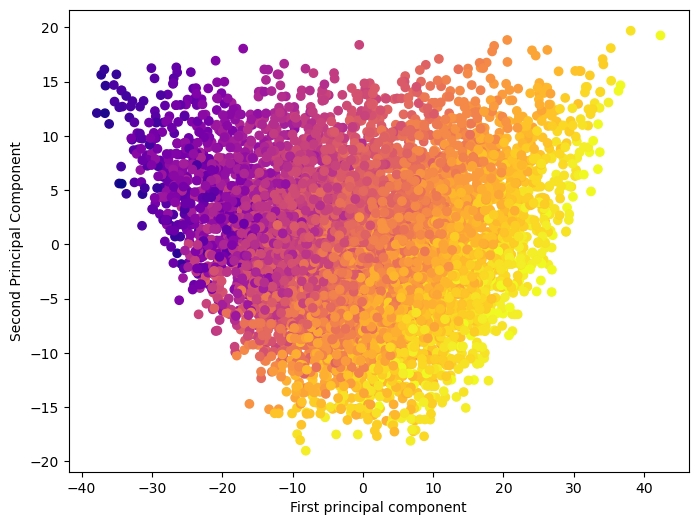

In [248]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=df_numbers['fourth'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [249]:
pca.components_

array([[ 0.28864254,  0.48815231,  0.57128048,  0.50954634,  0.30396373],
       [ 0.51610928,  0.50818304, -0.00479939, -0.47666061, -0.49814941],
       [ 0.52727386,  0.02598499, -0.58018566, -0.04223548,  0.61879546],
       [-0.53196335,  0.50275691,  0.05491762, -0.50965044,  0.44887744],
       [-0.29885441,  0.50001758, -0.57791369,  0.50162713, -0.27396066]])

In [250]:
df_comp = pd.DataFrame(pca.components_,columns=df_numbers.columns)

<Axes: >

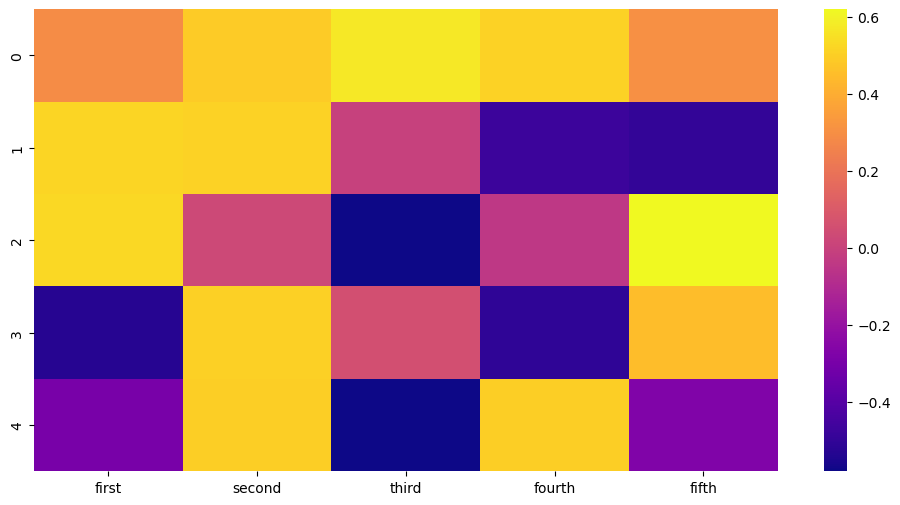

In [251]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [252]:
df_comp

,first,second,third,fourth,fifth
0,0.288643,0.488152,0.571280,0.509546,0.303964
1,0.516109,0.508183,-0.004799,-0.476661,-0.498149
2,0.527274,0.025985,-0.580186,-0.042235,0.618795
3,-0.531963,0.502757,0.054918,-0.509650,0.448877
4,-0.298854,0.500018,-0.577914,0.501627,-0.273961


In [253]:
df_numbers.describe()

,first,second,third,fourth,fifth
count,7236.000000,7236.000000,7236.000000,7236.000000,7236.000000
mean,7.683527,15.179934,22.927722,30.442510,38.060945
std,6.042161,7.563029,8.058247,7.713809,6.172213
min,1.000000,2.000000,3.000000,5.000000,9.000000
25%,3.000000,9.000000,17.000000,25.000000,35.000000
50%,6.000000,14.000000,23.000000,31.000000,40.000000
75%,11.000000,20.000000,29.000000,37.000000,43.000000
max,38.000000,42.000000,43.000000,44.000000,45.000000


In [254]:
df_comp.describe()

,first,second,third,fourth,fifth
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.100242,0.405019,-0.107340,-0.003475,0.119905
std,0.487278,0.212013,0.485384,0.499985,0.481693
min,-0.531963,0.025985,-0.580186,-0.509650,-0.498149
25%,-0.298854,0.488152,-0.577914,-0.476661,-0.273961
50%,0.288643,0.500018,-0.004799,-0.042235,0.303964
75%,0.516109,0.502757,0.054918,0.501627,0.448877
max,0.527274,0.508183,0.571280,0.509546,0.618795


In [255]:
X_train.head()


,first,second,third,fifth
5098,9,21,35,45
6881,7,10,15,26
4990,11,28,38,44
1965,3,6,21,31
5257,11,12,13,38


In [256]:
df.head()

,date,first,second,third,fourth,fifth
0,"Jan 19, 2014",12,17,20,22,35
1,"Jan 19, 2014",11,13,20,24,38
2,"Jan 20, 2014",3,5,12,18,32
3,"Jan 20, 2014",3,5,12,16,29
4,"Jan 21, 2014",20,29,35,36,37


In [257]:
x 

,first,second,third,fifth
0,12,17,20,35
1,11,13,20,38
2,3,5,12,32
3,3,5,12,29
4,20,29,35,37
...,...,...,...,...
7231,2,6,31,45
7232,6,14,24,40
7233,6,9,22,32
7234,13,21,24,33


In [258]:
xx = df[['third']]

In [259]:
y

0       22
1       24
2       18
3       16
4       36
        ..
7231    43
7232    25
7233    27
7234    28
7235    25
Name: fourth, Length: 7236, dtype: int64

In [260]:
xx.head()

,third
0,20
1,20
2,12
3,12
4,35


In [261]:
lm2 = LinearRegression()

In [262]:
lm2.fit(xx,y)

LinearRegression()

In [263]:
predictions2 = lm2.predict(xx)
predictions2[:9]

array([28.42182362, 28.42182362, 22.90030018, 22.90030018, 38.77468007,
       27.73163319, 29.80220448, 34.63353749, 29.11201405])

In [264]:
accruacy2 = accuracy_score(y, predictions2.round())

In [265]:
accruacy2

0.07283029297954671

In [266]:
df_numbers.head()

,first,second,third,fourth,fifth
0,12,17,20,22,35
1,11,13,20,24,38
2,3,5,12,18,32
3,3,5,12,16,29
4,20,29,35,36,37


In [267]:
df_long = df_numbers.transpose()

In [268]:
df_long.head()

,0,1,2,3,4,5,6,7,8,9,...,7226,7227,7228,7229,7230,7231,7232,7233,7234,7235
first,12,11,3,3,20,11,1,12,10,9,...,12,2,10,8,1,2,6,6,13,10
second,17,13,5,5,29,14,3,28,18,11,...,20,17,15,31,2,6,14,9,21,20
third,20,20,12,12,35,19,22,29,21,13,...,32,20,18,33,19,31,24,22,24,24
fourth,22,24,18,16,36,23,26,31,33,19,...,34,28,37,37,24,43,25,27,28,25
fifth,35,38,32,29,37,30,36,39,35,20,...,45,32,40,38,34,45,40,32,33,36


In [305]:
df_long[7235]

first     10
second    20
third     24
fourth    25
fifth     36
Name: 7235, dtype: int64

In [291]:
x = df_long[0:7235]

In [292]:
y = [10, 20, 24, 25, 36] #14344	Dec 14, 2023	Thursday	midday	

In [302]:

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.8)

In [303]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [304]:
rmse_val = []
for K in range(3):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred = model.predict(X_test) #make prediction on test set
    print(pred)
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

[24. 24. 24. 24.]
RMSE value for k=  1 is: 9.447221813845593


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 2

In [296]:
model = neighbors.KNeighborsRegressor(n_neighbors=1)
model.fit(x, y)

KNeighborsRegressor(n_neighbors=1)

In [297]:
prediction = model.predict(x)
print(prediction)

[10. 20. 24. 25. 36.]


In [298]:
df_long.shape

(5, 7236)

In [299]:
rmse_val

[11.0, 11.5, 13.0]

In [300]:
y_test

[36]

In [301]:

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
cv = KFold(n_splits=df_long.shape[0], shuffle=True)
scores = []

for train_index, test_index in cv.split(df):
    X_train, X_test = df_long.iloc[train_index, :], df.iloc[test_index, :]
    y_train, y_test = df_long.iloc[train_index, 7000], df_long.iloc[test_index, 7000]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    scores.append(mean_squared_error(y_test, predictions))

print(f"Average MSE: {np.mean(scores)}")



IndexError: positional indexers are out-of-bounds